In [210]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [200]:
pwd

'/Users/wli17/Documents/GLMM/Simulation_data_GLMM'

In [201]:
LA_files_dirs = glob.glob('Result_LA/*.csv')
GH_files_dirs = glob.glob('Result_GH/*.csv')
R_files_dirs = glob.glob('Result_R/*.csv')

In [202]:
# cols = ['Truth', 'Coef', 'Std.Err', 'z', 'P-value', '[0.025', '0.975]', 'RunTime']
# for d in LA_files_dirs:
#     pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)
# for d in GH_files_dirs:
#     pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)

In [203]:
LA_result = []
GH_result = []
R_result = []
for d in LA_files_dirs:
    LA_result.append(d.split('/')[1])
for d in GH_files_dirs:
    GH_result.append(d.split('/')[1])
for d in R_files_dirs:
    R_result.append(d.split('/')[1])

In [204]:
import fnmatch

In [205]:
filtered = fnmatch.filter(GH_result, 'Setting_4*')
success = []
s = [str(i+1) for i in range(20)]
for l in filtered:
    success.append(l[10:].split('.')[0])
failed = set(s).difference(set(success))
print(len(failed), success)

0 ['5', '4', '6', '7', '3', '2', '1', '20', '19', '18', '15', '14', '16', '17', '13', '12', '10', '11', '9', '8']


In [206]:
df = (pd.read_csv('Result_R/' + LA_result[0], index_col=0) - pd.read_csv('Result_LA/' + LA_result[0], index_col=0))['Coef']

In [207]:
pd.read_csv('Result_LA/' + LA_result[0], index_col=0)

,Truth,Coef,Std.Err,z,P-value,[0.025,0.975],RunTime
X1,-1.50,-0.833242,0.050162,-16.610956,5.806094e-62,-0.931558,-0.734925,509.258213
X2,0.10,0.184284,0.108756,1.694475,9.017504e-02,-0.028873,0.397441,509.258213
X3,-0.50,-0.334089,0.072014,-4.639228,3.497124e-06,-0.475233,-0.192944,509.258213
X4,-0.30,-0.140871,0.064375,-2.188276,2.864949e-02,-0.267043,-0.014698,509.258213
X5,0.40,0.302674,0.064441,4.696916,2.641192e-06,0.176372,0.428976,509.258213
X6,-0.20,-0.160021,0.032068,-4.989989,6.038269e-07,-0.222874,-0.097168,509.258213
X7,-0.25,-0.191493,0.021332,-8.976876,2.785633e-19,-0.233302,-0.149683,509.258213
X8,0.35,0.090359,0.113046,0.799314,4.241082e-01,-0.131207,0.311925,509.258213
X9,-0.10,-0.126921,0.080786,-1.571079,1.161643e-01,-0.285258,0.031416,509.258213
X10,0.50,0.403335,0.055718,7.238833,4.525629e-13,0.294129,0.512540,509.258213


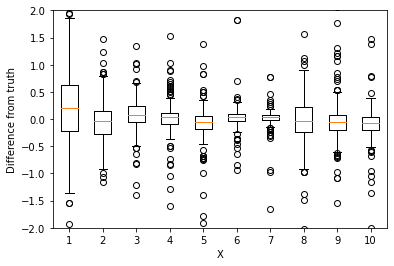

In [196]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

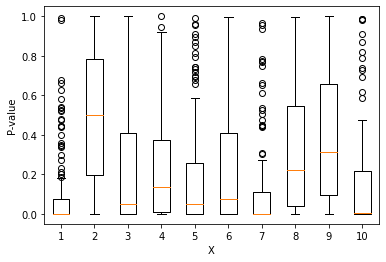

In [208]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
# plt.ylim(0, 1)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('P-value')
plt.show()

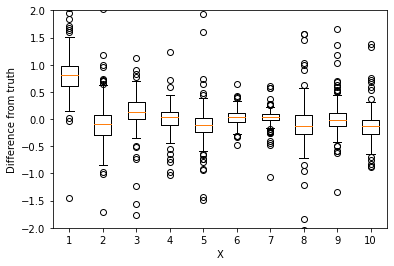

In [209]:
LA_coef = pd.DataFrame()
for f in LA_result:
    df = pd.read_csv('Result_LA/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    LA_coef = pd.concat([LA_coef, df], axis = 1)
LA_coef = LA_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(LA_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

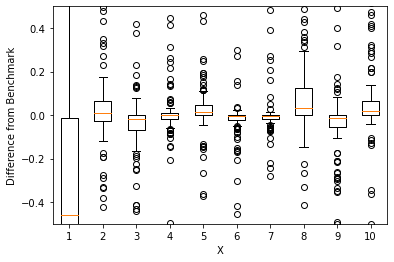

In [37]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

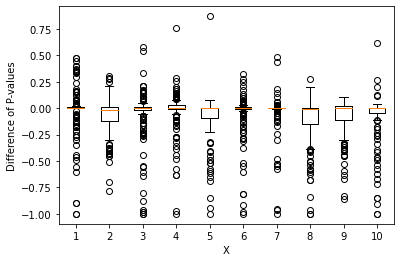

In [38]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

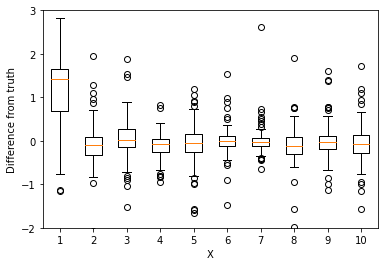

In [198]:
GH_coef = pd.DataFrame()
for f in GH_result:
    df = pd.read_csv('Result_GH/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    GH_coef = pd.concat([GH_coef, df], axis = 1)
GH_coef = GH_coef.dropna(axis = 1)
plt.ylim(-2, 3)
box = plt.boxplot(GH_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

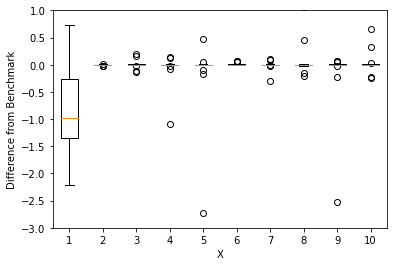

In [214]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

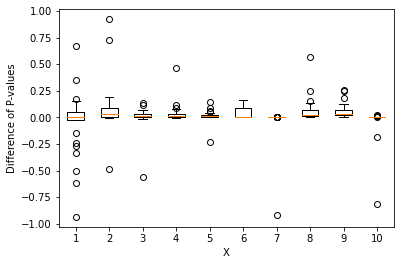

In [215]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

In [216]:
coef_dif

,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,...,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value
X1,-0.334175,0.015946,-0.027460,-0.934853,-2.107750e-03,-5.240222e-07,5.792805e-09,0.177177,0.134522,-0.237780,...,0.049225,-0.269787,1.716385e-02,0.155625,-4.991058e-01,-1.482834e-01,-0.620278,0.046260,4.738899e-02,3.482969e-01
X2,0.003556,0.723805,-0.001505,0.116185,1.763852e-01,4.379334e-03,-4.800330e-01,0.010758,0.013552,0.064261,...,0.089841,0.064461,8.792448e-03,0.010903,6.071317e-03,3.200100e-02,0.055135,0.035746,1.655485e-02,9.224908e-01
X3,0.011822,0.016790,0.016673,0.066330,1.125585e-05,1.057318e-02,-5.565659e-01,0.003120,0.013571,0.014558,...,0.133450,0.067641,-1.051858e-02,0.118799,2.301705e-02,3.332123e-02,0.008001,0.000579,4.841797e-02,8.639531e-03
X4,0.092636,0.035360,0.029560,0.076290,3.577574e-04,1.318478e-02,4.679086e-01,0.000890,0.007319,0.007429,...,0.021461,0.019220,6.566526e-07,0.001282,2.726277e-03,2.088402e-02,0.036112,0.018039,1.886656e-02,1.827867e-02
X5,0.001158,0.001656,0.014734,0.001492,9.068984e-03,3.701709e-02,-2.273417e-01,0.049240,0.002348,0.009429,...,0.007620,0.019690,1.683285e-03,0.084928,1.062025e-02,1.671252e-02,0.028698,0.006019,1.127051e-02,1.463774e-01
X6,0.116824,0.000392,0.000690,0.162572,2.033902e-04,6.397002e-03,2.723122e-04,0.000921,0.014591,0.002609,...,0.122756,0.004571,1.911139e-02,0.098216,4.149987e-03,2.807101e-02,0.042223,0.016094,4.491859e-03,7.352527e-07
X7,0.002658,0.000275,0.000007,0.003007,2.461792e-17,2.063931e-06,-9.151712e-01,0.000605,0.000001,0.000165,...,0.000088,0.000417,4.253967e-04,0.000383,1.137378e-09,7.098342e-08,0.003695,0.000114,3.919990e-07,1.341957e-03
X8,0.012678,0.065825,0.028608,0.103337,1.657900e-02,1.376205e-03,2.469568e-01,0.024143,0.011515,0.002953,...,0.113047,0.005392,2.470823e-02,0.031843,1.349539e-03,1.811604e-02,0.045224,0.006000,1.177167e-02,5.666135e-01
X9,0.117434,0.184965,0.028997,0.004132,6.033576e-02,1.816735e-02,2.448572e-01,0.045814,0.005584,0.019692,...,0.058268,0.028669,2.448203e-02,0.085237,3.236138e-02,1.978204e-02,0.071763,0.007178,2.115033e-02,1.139568e-01
X10,0.003670,0.000009,0.000008,0.000725,9.269791e-17,9.081701e-03,-1.870186e-01,0.000681,0.000004,0.000455,...,0.000329,0.000160,3.507241e-05,0.000021,8.059193e-04,5.010714e-03,0.000475,0.000258,1.902221e-03,-8.103074e-01


# LA vs R

In [160]:
thres = 0.05

In [161]:
la_pvalues = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = pd.read_csv('Result_LA/' + f, index_col=0)['P-value']
    la_pvalues = pd.concat([la_pvalues, df], axis = 1)
la_pvalues.columns = set(LA_result).intersection(set(R_result))
la_pvalues = (la_pvalues <= thres)
la_pvalues.replace(True, 1, inplace = True)
la_pvalues.replace(False, 0, inplace = True)

In [162]:
r_pvalues = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(LA_result).intersection(set(R_result))
r_pvalues = (r_pvalues <= thres)
r_pvalues.replace(True, 1, inplace = True)
r_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [163]:
tp = (la_pvalues * r_pvalues).sum(axis = 1)
tn = (la_pvalues + r_pvalues == 0).sum(axis = 1)
fp = (la_pvalues - r_pvalues == 1).sum(axis = 1)
fn = (la_pvalues - r_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [164]:
pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

,Precision,Recall,True negative rate,Accuracy
X1,0.834951,0.811321,0.595238,0.750000
X2,0.888889,0.615385,0.992593,0.959459
X3,0.967742,0.821918,0.973333,0.898649
X4,0.928571,0.912281,0.956044,0.939189
X5,0.984127,0.837838,0.986486,0.912162
X6,0.985294,0.943662,0.987013,0.966216
X7,1.000000,0.915094,1.000000,0.939189
X8,0.941176,0.780488,0.981308,0.925676
X9,0.833333,0.750000,0.976562,0.945946
X10,1.000000,0.838710,1.000000,0.898649


# GH vs R

In [169]:
thres = 0.05

In [189]:
gh_pvalues = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = pd.read_csv('Result_GH/' + f, index_col=0)['P-value']
    gh_pvalues = pd.concat([gh_pvalues, df], axis = 1)
gh_pvalues.columns = set(GH_result).intersection(set(R_result))
gh_pvalues = (gh_pvalues <= thres)
gh_pvalues.replace(True, 1, inplace = True)
gh_pvalues.replace(False, 0, inplace = True)

In [190]:
r_pvalues = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(GH_result).intersection(set(R_result))
r_pvalues = (r_pvalues <= thres)
r_pvalues.replace(True, 1, inplace = True)
r_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [191]:
tp = (gh_pvalues * r_pvalues).sum(axis = 1)
tn = (gh_pvalues + r_pvalues == 0).sum(axis = 1)
fp = (gh_pvalues - r_pvalues == 1).sum(axis = 1)
fn = (gh_pvalues - r_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [192]:
pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

,Precision,Recall,True negative rate,Accuracy
X1,0.857143,0.653465,0.731707,0.676056
X2,0.290323,0.750000,0.830769,0.823944
X3,0.887324,0.863014,0.884058,0.873239
X4,0.726027,0.946429,0.767442,0.838028
X5,0.891892,0.916667,0.885714,0.901408
X6,0.841463,0.985714,0.819444,0.901408
X7,0.924528,0.980000,0.809524,0.929577
X8,0.673469,0.804878,0.841584,0.830986
X9,0.372093,0.800000,0.778689,0.781690
X10,0.918605,0.877778,0.865385,0.873239


In [193]:
gh_pvalues

,Setting_2_14.csv,Setting_2_12.csv,Setting_4_6.csv,Setting_2_6.csv,Setting_8_6.csv,Setting_7_16.csv,Setting_5_6.csv,Setting_2_16.csv,Setting_8_8.csv,Setting_1_4.csv,...,Setting_1_2.csv,Setting_4_5.csv,Setting_8_12.csv,Setting_5_12.csv,Setting_7_15.csv,Setting_8_10.csv,Setting_1_17.csv,Setting_1_16.csv,Setting_7_14.csv,Setting_3_3.csv
X1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
X2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
X3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
X4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
X5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
X6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
X7,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
X8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
X9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
X10,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [194]:
r_pvalues

,Setting_2_14.csv,Setting_2_12.csv,Setting_4_6.csv,Setting_2_6.csv,Setting_8_6.csv,Setting_7_16.csv,Setting_5_6.csv,Setting_2_16.csv,Setting_8_8.csv,Setting_1_4.csv,...,Setting_1_2.csv,Setting_4_5.csv,Setting_8_12.csv,Setting_5_12.csv,Setting_7_15.csv,Setting_8_10.csv,Setting_1_17.csv,Setting_1_16.csv,Setting_7_14.csv,Setting_3_3.csv
X1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
X2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
X3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
X4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
X5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
X6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
X7,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
X8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
X9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
X10,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Runtime